# Using the model server to do an inference using GRPC

## First, make sure we have the libraries we need
Have a look at requirements.txt to see which libraries are used.

In [ ]:
!pip install -qr requirements.txt

# Only if you don't have PyTorch installed
#!pip install -q -r requirements-torch-cpu.txt

In [5]:
!pip install protobuf==3.19.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Import the libraries and module where we have all helper code for doing the inference

In [11]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from remote_infer_grpc import ort_v5

## Enter the grpc host and port number, the model name and the YAML file containing your classes

In [12]:
grpc_host = 'modelmesh-serving.object-detection-yolov5.svc.cluster.local'
grpc_port = 8033
model_name = 'object-detection-yolov5-model'
classes_file = 'coco.yaml'

## Now set the parameters for the inference

In [13]:
# 1. The image you want to analyze
image_path='images/zidane.jpg'
#image_path='images/bus.jpg' # You can replace this with an image you upload

# 2. Confidence threshold, between 0 and 1 (detections with less score won't be retained)
conf = 0.2

# 3. Intersection over Union Threshold, between 0 and 1 (cleanup overlapping boxes)
iou = 0.6

## Launch the inference and show the result

images/zidane.jpg processed in 0.21 seconds, inference time 0.06 seconds
Predictions:
tensor([[3.5752e+02, 1.5877e+02, 5.8449e+02, 4.9518e+02, 3.8260e-01, 0.0000e+00],
        [7.1869e+01, 2.3494e+02, 3.6900e+02, 5.0246e+02, 2.1574e-01, 0.0000e+00],
        [2.0119e+02, 3.5403e+02, 2.6172e+02, 4.9749e+02, 2.1179e-01, 2.7000e+01]])
Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]
The coordinates are relative to a letterboxed representation of the image of size 640x640


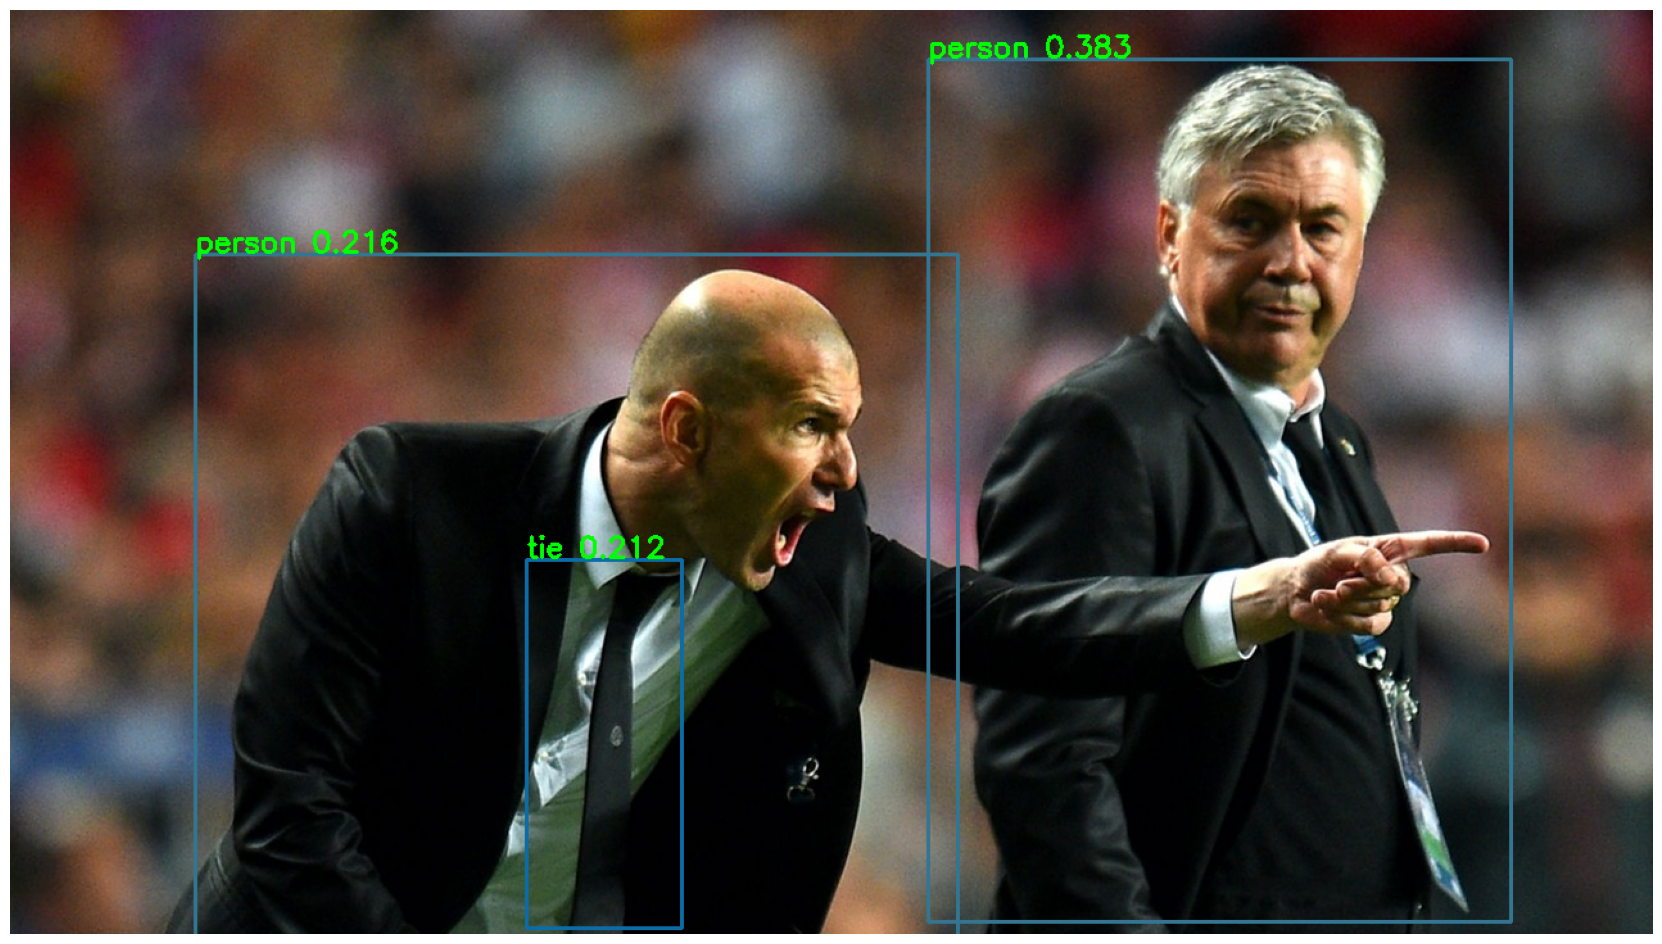

In [14]:
infer=ort_v5(grpc_host, grpc_port, model_name, 640, classes_file)
img, out, result = infer(image_path, conf, iou)
print(f'{result}')
print('Predictions:')
print(out)
print('Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]')
print('The coordinates are relative to a letterboxed representation of the image of size 640x640')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.axis('off')
plt.imshow(img);

## Time it on multiple images!

In [15]:
import os
import time

folder_path = 'images'
infer=ort_v5(grpc_host, grpc_port, model_name, 640, classes_file)

start_time = time.time()

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Get the full path of the file
    file_path = os.path.join(folder_path, filename)

    # Check if the file path is a file (not a directory)
    if os.path.isfile(file_path):
        # Do the inference on the file
        img, out, result = infer(file_path, conf, iou)
        print(f'{result}')

end_time = time.time()
execution_time = end_time - start_time
print(f"Executed in {execution_time:.2f} seconds")

images/08d644aa5be91b44_jpg.rf.4dcf8c40712878d2794102541696357c.jpg processed in 0.16 seconds, inference time 0.05 seconds
images/02bb5655ce627b56_jpg.rf.fb6901093c815cc5076c2c4d75631b42.jpg processed in 0.15 seconds, inference time 0.04 seconds
images/044d4e8762f2c8bc_jpg.rf.7371ecaacd72dba5ec1c49d4bd02e5a3.jpg processed in 0.17 seconds, inference time 0.05 seconds
images/029e44f5c186d518_jpg.rf.761691070193ef08cfa53ab14374d5f8.jpg processed in 0.23 seconds, inference time 0.04 seconds
images/034851e4ec3464aa_jpg.rf.9e3cad4c6cf6793aa2b09538016d7d30.jpg processed in 0.16 seconds, inference time 0.04 seconds
images/01c7a957c612291f_jpg.rf.a94ab799531f25ea2879f5294942f395.jpg processed in 0.16 seconds, inference time 0.04 seconds
images/056c3e43bad4d5f9_jpg.rf.9cdabc97d588216c6a0c633089b5e3fc.jpg processed in 0.16 seconds, inference time 0.04 seconds
images/032c163a8716cba5_jpg.rf.4759c9dfc3e45b97e47ed3ec9c10e00a.jpg processed in 0.16 seconds, inference time 0.04 seconds
images/023a76e1b